In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)



In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="0000:68:00.0";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";  

In [62]:
# print(K.tensorflow_backend._get_available_gpus())
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras.layers as layers
import keras
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.models import Sequential, Input, Model
from keras.layers import (Dense, Conv1D, Convolution2D, GRU, LSTM, Recurrent, Bidirectional, TimeDistributed,
                          Dropout, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.regularizers import l1,l2
from keras.models import load_model
from sklearn import preprocessing
from keras.models import load_model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.decomposition import NMF
from scipy import io
import numpy as np
import os
import os.path

# # loads the custom graphing format
# viz.format.custom_plt_format()

# plt.style.use('seaborn-white')

Using TensorFlow backend.


In [3]:
import os
if os.path.exists("./Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks"):
    pass
else:
    !git clone https://github.com/jagar2/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks.git

In [3]:
cd Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks

/home/shuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [19]:
cd 497_MAT_Assignment/

[Errno 2] No such file or directory: '497_MAT_Assignment/'
/home/shuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [27]:
!pip install -U moviepy keras tensorflow natsort tqdm scikit_image scikit_learn scipy
!pip install pillow==6.1
!pip install -U imageio

Requirement already up-to-date: moviepy in /home/shuyu/anaconda3/lib/python3.7/site-packages (1.0.1)
Requirement already up-to-date: keras in /home/shuyu/anaconda3/lib/python3.7/site-packages (2.3.1)
Requirement already up-to-date: tensorflow in /home/shuyu/anaconda3/lib/python3.7/site-packages (2.1.0)
Requirement already up-to-date: natsort in /home/shuyu/anaconda3/lib/python3.7/site-packages (7.0.1)
Requirement already up-to-date: tqdm in /home/shuyu/anaconda3/lib/python3.7/site-packages (4.42.1)
Requirement already up-to-date: scikit_image in /home/shuyu/anaconda3/lib/python3.7/site-packages (0.16.2)
Requirement already up-to-date: scikit_learn in /home/shuyu/anaconda3/lib/python3.7/site-packages (0.22.1)
Requirement already up-to-date: scipy in /home/shuyu/anaconda3/lib/python3.7/site-packages (1.4.1)
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
  Using cache

ERROR: tensorflow-gpu 2.0.0 has requirement tensorboard<2.1.0,>=2.0.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow-gpu 2.0.0 has requirement tensorflow-estimator<2.1.0,>=2.0.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.0.0
    Uninstalling tensorflow-estimator-2.0.0:
      Successfully uninstalled tensorflow-estimator-2.0.0
  Found existing installation: tensorboard 2.0.0
    Uninstalling tensorboard-2.0.0:
      Successfully uninstalled tensorboard-2.0.0
Requirement already up-to-date: imageio in /home/shuyu/anaconda3/lib/python3.7/site-packages (2.6.1)


In [4]:
import warnings
warnings.filterwarnings('ignore')
import imp
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import codes.analysis.rnn as rnn
import codes.util as util
import codes.analysis.machine_learning as ml
import codes.analysis as an
import codes.processing as p
import codes.viz as viz
import codes.util.input_output as io_transfer



In [5]:
imported = {'data': io.matlab.loadmat('./Raw_Data/Data.mat'),
            'validation_data': io.matlab.loadmat('Raw_Data/loop_1.mat')}

# extracts the important information from the raw data
raw = {'voltage': imported['data']['Voltagedata_mixed'],
       'piezoresponse': imported['data']['Loopdata_mixed'],
       'amplitude': imported['data']['OutA2_mixed'],
       'phase': imported['data']['OutPhi1_mixed'],
       'resonance': imported['data']['Outw2_mixed'],
       'quality_factor': imported['data']['OutQ2_mixed'],
       'val_piezoresponse': imported['validation_data']['piezo_1'],
       'val_resonance': imported['validation_data']['resonance_loop_1']}

In [6]:
raw['piezoresponse'].shape

(60, 60, 96)

In [7]:
p.filters.range_filter(raw['resonance'], [1300, 1340])
p.filters.range_filter(raw['val_resonance'], [1300, 1340])

# interpolates data that is non-real. This happens when the SHO fit fails
interpolated = {'voltage': raw['voltage'],
                'piezoresponse': p.filters.clean_interpolate(raw['piezoresponse'],
                                                             'linear').reshape(-1, raw['piezoresponse'].shape[2]),
                'amplitude': p.filters.clean_interpolate(raw['amplitude'],
                                                         'linear').reshape(-1, raw['amplitude'].shape[2]),
                'phase': p.filters.clean_interpolate(raw['phase'],
                                                     'linear').reshape(-1, raw['phase'].shape[2]),
                'resonance': p.filters.clean_interpolate(raw['resonance'],
                                                         'linear').reshape(-1, raw['resonance'].shape[2]),
                'quality_factor': p.filters.clean_interpolate(raw['quality_factor'],
                                                              'linear').reshape(-1, raw['quality_factor'].shape[2]),
                'val_piezoresponse': p.filters.clean_interpolate(raw['val_piezoresponse'],
                                                                  'linear').reshape(-1, raw['val_piezoresponse'].shape[2]),
                'val_resonance': p.filters.clean_interpolate(raw['val_resonance'],
                                                             'linear').reshape(-1, raw['val_resonance'].shape[2])}
# Uses Savitzky-Golay filter to remove outlier points
sg_filtered = {'voltage': raw['voltage'],
               'piezoresponse': p.filters.savgol(interpolated['piezoresponse'], fit_type='linear'),
               'amplitude': p.filters.savgol(interpolated['amplitude'], fit_type='linear'),
               'phase': p.filters.savgol(interpolated['phase'], fit_type='linear'),
               'resonance': p.filters.savgol(interpolated['resonance'], fit_type='linear'),
               'quality_factor': p.filters.savgol(interpolated['quality_factor'], fit_type='linear'),
               'val_piezoresponse': p.filters.savgol(interpolated['val_piezoresponse'], fit_type='linear'),
               'val_resonance': p.filters.savgol(interpolated['val_resonance'], fit_type='linear')}

# normalized the data. This is important for training Neural Networks
normalized = {'voltage': raw['voltage'],
              'piezoresponse': p.filters.normalize(sg_filtered['piezoresponse']),
              'amplitude': p.filters.normalize(sg_filtered['amplitude']),
              'phase': p.filters.normalize(sg_filtered['phase']),
              'resonance': p.filters.normalize(sg_filtered['resonance']),
              'quality_factor': p.filters.normalize(sg_filtered['quality_factor']),
              'val_piezoresponse': p.filters.normalize(sg_filtered['val_piezoresponse'],
                                                       sg_filtered['piezoresponse']),
              'val_resonance': p.filters.normalize(sg_filtered['val_resonance'],
                                                   sg_filtered['resonance'])}

In [8]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
scipy: 1.4.1
numpy: 1.17.2
matplotlib: 2.2.3
pandas: 0.25.1
sklearn: 0.22.1


In [9]:
normalized['piezoresponse'].shape

(3600, 96)

In [10]:
def encode_identity_block(X, stage, block, size, n_step, drop_frac, l1_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'enconde' + str(stage) + block + '_branch'

    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)

    X = layers.add([X, X_shortcut])
    X = layers.Activation('relu')(X)

    return X


def decode_identity_block(X, stage, block, size, n_step, drop_frac, l1_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'decode' + str(stage) + block + '_branch'

    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)
    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)
    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)

    X = layers.add([X, X_shortcut])
    X = layers.Activation('relu')(X)

    return X


def ResNet50(lr=3e-5, size=128, drop_frac=0, n_step=96, embedding=16, l1_norm=1e-5):
    X_input = layers.Input(shape=(n_step, 1))
    X = X_input

    X = encode_identity_block(X, 2, 'b', size, n_step, drop_frac, l1_norm)
    X = encode_identity_block(X, 2, 'c', size, n_step, drop_frac, l1_norm)
    X = encode_identity_block(X, 2, 'd', size, n_step, drop_frac, l1_norm)

    X = layers.Bidirectional(LSTM(size, return_sequences=False, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)
    # X = layers.BatchNormalization(axis=1, name='last_encode')(X)
    X = layers.Activation('relu')(X)
    X = layers.Dense(embedding, activation='relu', name='embedding_layer', activity_regularizer=l1(l1_norm))(X)
    X = layers.RepeatVector(n_step)(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)

    # X = layers.BatchNormalization(axis = 1, name = 'fires_decode')(X)
    X = layers.Activation('relu')(X)

    X = decode_identity_block(X, 2, 'b', size, n_step, drop_frac, l1_norm)
    X = decode_identity_block(X, 2, 'c', size, n_step, drop_frac, l1_norm)
    X = decode_identity_block(X, 2, 'd', size, n_step, drop_frac, l1_norm)

    X = layers.BatchNormalization(axis=1, name='batch_normal')(X)
    X = layers.TimeDistributed(Dense(1, activation='linear'))(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    model.compile(Adam(lr), loss='mse')

    return model

In [11]:
X = np.atleast_3d(normalized['piezoresponse'])
Y = np.atleast_3d(normalized['val_piezoresponse'])

In [19]:
X.shape

(3600, 96, 1)

In [12]:
auto = ResNet50()
checkpointer = ModelCheckpoint("resnet_jagar_data_16", monitor='loss', verbose=0, save_best_only=True)

In [13]:
model1 = auto.fit(x = X,y = Y,epochs=5000,batch_size=256,steps_per_epoch = None,callbacks=[checkpointer])

Epoch 1/5000
3600/3600 [==============================] - 92s 26ms/step - loss: 40.2837
Epoch 2/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 26.6551
Epoch 3/5000
3600/3600 [==============================] - 71s 20ms/step - loss: 20.6110
Epoch 4/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 16.2605
Epoch 5/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 12.9607
Epoch 6/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 10.3672
Epoch 7/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 8.4012
Epoch 8/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 6.8989
Epoch 9/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 5.7199
Epoch 10/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 4.8099
Epoch 11/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 4.1110
Epoch 12/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 22ms/step - loss: 1.0097
Epoch 95/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.9908
Epoch 96/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.9789
Epoch 97/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.9745
Epoch 98/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.9579
Epoch 99/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.9480
Epoch 100/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.9385
Epoch 101/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.9484
Epoch 102/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.9358
Epoch 103/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.9211
Epoch 104/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.9129
Epoch 105/5000
3600/3600 [===============

3600/3600 [==============================] - 82s 23ms/step - loss: 0.4669
Epoch 187/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4607
Epoch 188/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.4509
Epoch 189/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.4465
Epoch 190/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4446
Epoch 191/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.4427
Epoch 192/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.4340
Epoch 193/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4289
Epoch 194/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.4233
Epoch 195/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4234
Epoch 196/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.4211
Epoch 197/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.1880
Epoch 279/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1840
Epoch 280/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.1813
Epoch 281/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1770
Epoch 282/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1741
Epoch 283/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1719
Epoch 284/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1690
Epoch 285/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1682
Epoch 286/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1650
Epoch 287/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1629
Epoch 288/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.1599
Epoch 289/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.1005
Epoch 371/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1000
Epoch 372/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0995
Epoch 373/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0998
Epoch 374/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0986
Epoch 375/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0992
Epoch 376/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0986
Epoch 377/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0994
Epoch 378/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0989
Epoch 379/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0978
Epoch 380/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0976
Epoch 381/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0980
Epoch 463/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0974
Epoch 464/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0972
Epoch 465/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0973
Epoch 466/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0974
Epoch 467/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0970
Epoch 468/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0980
Epoch 469/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0966
Epoch 470/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0962
Epoch 471/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0963
Epoch 472/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0960
Epoch 473/5000
3600/3600 [==========

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0953
Epoch 555/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0950
Epoch 556/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0957
Epoch 557/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0950
Epoch 558/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0957
Epoch 559/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0954
Epoch 560/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0952
Epoch 561/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0950
Epoch 562/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0980
Epoch 563/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0959
Epoch 564/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0966
Epoch 565/5000
3600/3600 [==========

3600/3600 [==============================] - 74s 21ms/step - loss: 0.0718
Epoch 647/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0873
Epoch 648/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0794
Epoch 649/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0729
Epoch 650/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0742
Epoch 651/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0764
Epoch 652/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0728
Epoch 653/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0767
Epoch 654/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0726
Epoch 655/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0751
Epoch 656/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0704
Epoch 657/5000
3600/3600 [==========

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0731
Epoch 739/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0665
Epoch 740/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0662
Epoch 741/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0650
Epoch 742/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0707
Epoch 743/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0674
Epoch 744/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0739
Epoch 745/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0725
Epoch 746/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0705
Epoch 747/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0656
Epoch 748/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0663
Epoch 749/5000
3600/3600 [==========

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0596
Epoch 831/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0699
Epoch 832/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0650
Epoch 833/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0609
Epoch 834/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0603
Epoch 835/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0616
Epoch 836/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0597
Epoch 837/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0589
Epoch 838/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0592
Epoch 839/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0633
Epoch 840/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0612
Epoch 841/5000
3600/3600 [==========

3600/3600 [==============================] - 84s 23ms/step - loss: 0.0468
Epoch 923/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0511
Epoch 924/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0494
Epoch 925/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0504
Epoch 926/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0503
Epoch 927/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0479
Epoch 928/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0483
Epoch 929/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0460
Epoch 930/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0474
Epoch 931/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0473
Epoch 932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0471
Epoch 933/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0438
Epoch 1015/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0456
Epoch 1016/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0427
Epoch 1017/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0424
Epoch 1018/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0442
Epoch 1019/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0481
Epoch 1020/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0519
Epoch 1021/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0456
Epoch 1022/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0439
Epoch 1023/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0441
Epoch 1024/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0417
Epoch 1025/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0435
Epoch 1106/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0539
Epoch 1107/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0449
Epoch 1108/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0439
Epoch 1109/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0410
Epoch 1110/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0418
Epoch 1111/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0398
Epoch 1112/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0411
Epoch 1113/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0416
Epoch 1114/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0393
Epoch 1115/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0423
Epoch 1116/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0396
Epoch 1197/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0376
Epoch 1198/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0394
Epoch 1199/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0396
Epoch 1200/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0382
Epoch 1201/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0447
Epoch 1202/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0438
Epoch 1203/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0413
Epoch 1204/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0380
Epoch 1205/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0408
Epoch 1206/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0385
Epoch 1207/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0371
Epoch 1288/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0369
Epoch 1289/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0399
Epoch 1290/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0368
Epoch 1291/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0363
Epoch 1292/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0370
Epoch 1293/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0380
Epoch 1294/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0357
Epoch 1295/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0357
Epoch 1296/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0350
Epoch 1297/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0367
Epoch 1298/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0466
Epoch 1379/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0382
Epoch 1380/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0380
Epoch 1381/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0416
Epoch 1382/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0383
Epoch 1383/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0347
Epoch 1384/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0345
Epoch 1385/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0357
Epoch 1386/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0344
Epoch 1387/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0340
Epoch 1388/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0359
Epoch 1389/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0365
Epoch 1470/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0349
Epoch 1471/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0345
Epoch 1472/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0336
Epoch 1473/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0327
Epoch 1474/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0336
Epoch 1475/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0328
Epoch 1476/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0326
Epoch 1477/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0331
Epoch 1478/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0351
Epoch 1479/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0351
Epoch 1480/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0324
Epoch 1561/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0325
Epoch 1562/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0341
Epoch 1563/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0319
Epoch 1564/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0323
Epoch 1565/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0350
Epoch 1566/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0345
Epoch 1567/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0323
Epoch 1568/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0329
Epoch 1569/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0349
Epoch 1570/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0322
Epoch 1571/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0319
Epoch 1652/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0313
Epoch 1653/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0308
Epoch 1654/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0306
Epoch 1655/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0299
Epoch 1656/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0293
Epoch 1657/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0314
Epoch 1658/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0311
Epoch 1659/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0314
Epoch 1660/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0324
Epoch 1661/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0352
Epoch 1662/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0334
Epoch 1743/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0313
Epoch 1744/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0296
Epoch 1745/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0304
Epoch 1746/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0316
Epoch 1747/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0300
Epoch 1748/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0309
Epoch 1749/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0306
Epoch 1750/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0302
Epoch 1751/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0297
Epoch 1752/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0286
Epoch 1753/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0296
Epoch 1834/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0289
Epoch 1835/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0281
Epoch 1836/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0309
Epoch 1837/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0291
Epoch 1838/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0283
Epoch 1839/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0282
Epoch 1840/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0311
Epoch 1841/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0296
Epoch 1842/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0296
Epoch 1843/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0291
Epoch 1844/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0281
Epoch 1925/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0276
Epoch 1926/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0272
Epoch 1927/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0283
Epoch 1928/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0296
Epoch 1929/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0359
Epoch 1930/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0300
Epoch 1931/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0303
Epoch 1932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0276
Epoch 1933/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0282
Epoch 1934/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0290
Epoch 1935/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0260
Epoch 2016/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0271
Epoch 2017/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0276
Epoch 2018/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0277
Epoch 2019/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0296
Epoch 2020/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0269
Epoch 2021/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0287
Epoch 2022/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0350
Epoch 2023/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0311
Epoch 2024/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0280
Epoch 2025/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0277
Epoch 2026/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0266
Epoch 2107/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0285
Epoch 2108/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0270
Epoch 2109/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0269
Epoch 2110/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0297
Epoch 2111/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0281
Epoch 2112/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0265
Epoch 2113/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0280
Epoch 2114/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0290
Epoch 2115/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0272
Epoch 2116/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0296
Epoch 2117/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0266
Epoch 2198/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0275
Epoch 2199/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0279
Epoch 2200/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0286
Epoch 2201/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0271
Epoch 2202/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0261
Epoch 2203/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0250
Epoch 2204/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0252
Epoch 2205/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0280
Epoch 2206/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0269
Epoch 2207/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0275
Epoch 2208/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0266
Epoch 2289/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0269
Epoch 2290/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0256
Epoch 2291/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0262
Epoch 2292/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0280
Epoch 2293/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0269
Epoch 2294/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0255
Epoch 2295/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0249
Epoch 2296/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0255
Epoch 2297/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0252
Epoch 2298/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0292
Epoch 2299/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0264
Epoch 2380/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0254
Epoch 2381/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0253
Epoch 2382/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0313
Epoch 2383/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0283
Epoch 2384/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0281
Epoch 2385/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0252
Epoch 2386/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0260
Epoch 2387/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0258
Epoch 2388/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0252
Epoch 2389/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0271
Epoch 2390/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0246
Epoch 2471/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0342
Epoch 2472/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0305
Epoch 2473/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0260
Epoch 2474/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0268
Epoch 2475/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0263
Epoch 2476/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0242
Epoch 2477/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0238
Epoch 2478/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0243
Epoch 2479/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0237
Epoch 2480/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0242
Epoch 2481/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0243
Epoch 2562/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0262
Epoch 2563/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0258
Epoch 2564/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0253
Epoch 2565/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0247
Epoch 2566/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0235
Epoch 2567/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0250
Epoch 2568/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0238
Epoch 2569/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0239
Epoch 2570/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0232
Epoch 2571/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0247
Epoch 2572/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0248
Epoch 2653/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0241
Epoch 2654/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0256
Epoch 2655/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0251
Epoch 2656/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0239
Epoch 2657/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0243
Epoch 2658/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0243
Epoch 2659/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0246
Epoch 2660/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0243
Epoch 2661/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0240
Epoch 2662/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0242
Epoch 2663/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0322
Epoch 2744/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0280
Epoch 2745/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0266
Epoch 2746/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0236
Epoch 2747/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0231
Epoch 2748/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0250
Epoch 2749/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0244
Epoch 2750/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0247
Epoch 2751/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0236
Epoch 2752/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0225
Epoch 2753/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0226
Epoch 2754/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0232
Epoch 2835/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0226
Epoch 2836/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0235
Epoch 2837/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0240
Epoch 2838/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0279
Epoch 2839/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0272
Epoch 2840/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0275
Epoch 2841/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0242
Epoch 2842/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0238
Epoch 2843/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0224
Epoch 2844/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0237
Epoch 2845/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0234
Epoch 2926/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0224
Epoch 2927/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0228
Epoch 2928/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0222
Epoch 2929/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0221
Epoch 2930/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0224
Epoch 2931/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0233
Epoch 2932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0226
Epoch 2933/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0238
Epoch 2934/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0227
Epoch 2935/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0223
Epoch 2936/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0233
Epoch 3017/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0225
Epoch 3018/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0218
Epoch 3019/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0236
Epoch 3020/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0243
Epoch 3021/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0235
Epoch 3022/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0225
Epoch 3023/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0217
Epoch 3024/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0222
Epoch 3025/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0710
Epoch 3026/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0691
Epoch 3027/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0224
Epoch 3108/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0219
Epoch 3109/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0266
Epoch 3110/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0232
Epoch 3111/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0225
Epoch 3112/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0224
Epoch 3113/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0230
Epoch 3114/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0242
Epoch 3115/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0221
Epoch 3116/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0252
Epoch 3117/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0237
Epoch 3118/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0215
Epoch 3199/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3200/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0214
Epoch 3201/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0220
Epoch 3202/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0252
Epoch 3203/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0227
Epoch 3204/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0220
Epoch 3205/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0228
Epoch 3206/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0219
Epoch 3207/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0270
Epoch 3208/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0242
Epoch 3209/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0234
Epoch 3290/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0217
Epoch 3291/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0257
Epoch 3292/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0227
Epoch 3293/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0236
Epoch 3294/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0214
Epoch 3295/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0217
Epoch 3296/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0217
Epoch 3297/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0223
Epoch 3298/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0208
Epoch 3299/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0226
Epoch 3300/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0210
Epoch 3381/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0212
Epoch 3382/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3383/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3384/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0219
Epoch 3385/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0212
Epoch 3386/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3387/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0219
Epoch 3388/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0204
Epoch 3389/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0242
Epoch 3390/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0253
Epoch 3391/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0227
Epoch 3472/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0291
Epoch 3473/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0244
Epoch 3474/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0220
Epoch 3475/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0214
Epoch 3476/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0219
Epoch 3477/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0218
Epoch 3478/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0223
Epoch 3479/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0216
Epoch 3480/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0223
Epoch 3481/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0210
Epoch 3482/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0219
Epoch 3563/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0226
Epoch 3564/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0226
Epoch 3565/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0212
Epoch 3566/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0206
Epoch 3567/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0207
Epoch 3568/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0204
Epoch 3569/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0226
Epoch 3570/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0206
Epoch 3571/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0197
Epoch 3572/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0233
Epoch 3573/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0217
Epoch 3654/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0200
Epoch 3655/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0199
Epoch 3656/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0198
Epoch 3657/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0203
Epoch 3658/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0197
Epoch 3659/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0221
Epoch 3660/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0215
Epoch 3661/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0214
Epoch 3662/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0237
Epoch 3663/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0240
Epoch 3664/5000
3600/3600 

3600/3600 [==============================] - 69s 19ms/step - loss: 0.0219
Epoch 3745/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0210
Epoch 3746/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3747/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0205
Epoch 3748/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0205
Epoch 3749/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0202
Epoch 3750/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0207
Epoch 3751/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0213
Epoch 3752/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 3753/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0259
Epoch 3754/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0226
Epoch 3755/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0202
Epoch 3836/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0201
Epoch 3837/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0195
Epoch 3838/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0204
Epoch 3839/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0195
Epoch 3840/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0226
Epoch 3841/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0208
Epoch 3842/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0206
Epoch 3843/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0216
Epoch 3844/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0201
Epoch 3845/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0206
Epoch 3846/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0202
Epoch 3927/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0193
Epoch 3928/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0192
Epoch 3929/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0228
Epoch 3930/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0203
Epoch 3931/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 3932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0192
Epoch 3933/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0202
Epoch 3934/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 3935/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0295
Epoch 3936/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0261
Epoch 3937/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 4018/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0196
Epoch 4019/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 4020/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0196
Epoch 4021/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0193
Epoch 4022/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0195
Epoch 4023/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0211
Epoch 4024/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 4025/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0211
Epoch 4026/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0205
Epoch 4027/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0196
Epoch 4028/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0199
Epoch 4109/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0206
Epoch 4110/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0199
Epoch 4111/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0201
Epoch 4112/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0198
Epoch 4113/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0197
Epoch 4114/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0196
Epoch 4115/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0189
Epoch 4116/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0198
Epoch 4117/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0202
Epoch 4118/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0197
Epoch 4119/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0193
Epoch 4200/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 4201/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0194
Epoch 4202/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0205
Epoch 4203/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0197
Epoch 4204/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0417
Epoch 4205/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0321
Epoch 4206/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0256
Epoch 4207/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0221
Epoch 4208/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0206
Epoch 4209/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0196
Epoch 4210/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0207
Epoch 4291/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0207
Epoch 4292/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0200
Epoch 4293/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0194
Epoch 4294/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 4295/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0190
Epoch 4296/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0192
Epoch 4297/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0192
Epoch 4298/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0188
Epoch 4299/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0188
Epoch 4300/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0197
Epoch 4301/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0200
Epoch 4382/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 4383/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0194
Epoch 4384/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0196
Epoch 4385/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0185
Epoch 4386/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0185
Epoch 4387/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0191
Epoch 4388/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0187
Epoch 4389/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0183
Epoch 4390/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0187
Epoch 4391/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0270
Epoch 4392/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0224
Epoch 4473/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0204
Epoch 4474/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0190
Epoch 4475/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0182
Epoch 4476/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0184
Epoch 4477/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0194
Epoch 4478/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0187
Epoch 4479/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0185
Epoch 4480/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0204
Epoch 4481/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0192
Epoch 4482/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0184
Epoch 4483/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0190
Epoch 4564/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0193
Epoch 4565/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0192
Epoch 4566/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0221
Epoch 4567/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0216
Epoch 4568/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0194
Epoch 4569/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0190
Epoch 4570/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0206
Epoch 4571/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0217
Epoch 4572/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0193
Epoch 4573/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0185
Epoch 4574/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0207
Epoch 4655/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0189
Epoch 4656/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0190
Epoch 4657/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0207
Epoch 4658/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0194
Epoch 4659/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0190
Epoch 4660/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0185
Epoch 4661/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0186
Epoch 4662/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0183
Epoch 4663/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0188
Epoch 4664/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0183
Epoch 4665/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0192
Epoch 4746/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0198
Epoch 4747/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0218
Epoch 4748/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0186
Epoch 4749/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0189
Epoch 4750/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0186
Epoch 4751/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0186
Epoch 4752/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0326
Epoch 4753/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0286
Epoch 4754/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0269
Epoch 4755/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0233
Epoch 4756/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0201
Epoch 4837/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0195
Epoch 4838/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0190
Epoch 4839/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0216
Epoch 4840/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0200
Epoch 4841/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0195
Epoch 4842/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0193
Epoch 4843/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0198
Epoch 4844/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0225
Epoch 4845/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0199
Epoch 4846/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0213
Epoch 4847/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0190
Epoch 4928/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0201
Epoch 4929/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0187
Epoch 4930/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0190
Epoch 4931/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0185
Epoch 4932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0191
Epoch 4933/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0183
Epoch 4934/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0184
Epoch 4935/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0250
Epoch 4936/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0217
Epoch 4937/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0206
Epoch 4938/5000
3600/3600 

In [14]:
result = auto.predict(X)

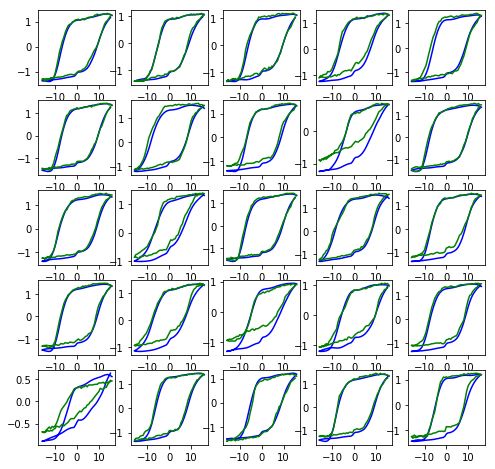

In [17]:
f_y5 = X
f_y6 = Y
f_fit = result

fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,5):
    for j in range(0,5):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(normalized['voltage'],f_fit[k],'b-')
        ax.plot(normalized['voltage'],f_y6[k],'g-')

# Folders

In [18]:
# builds folders where the data will be saved
folder_structure = util.file.make_folder(
    './structure')
folder_BE = util.file.make_folder(
    './Band_Excitation')
folder_BE_Movie_files = util.file.make_folder(
    folder_BE + '/BE_Movie_Files')
folder_BE_all_images = util.file.make_folder(
    folder_BE + '/BE_all_images')
folder_BE_spectra = util.file.make_folder(
    folder_BE + '/BE_spectra')
folder_BE_cleaned_spectra = util.file.make_folder(
    folder_BE + '/cleaned_spectra')
folder_pca = util.file.make_folder(
    './pca')
folder_nmf = util.file.make_folder(
    './nmf')
folder_clustering = util.file.make_folder('./clustering')
folder_pca_clustering = util.file.make_folder(
    './pca_clustering')
folder_piezoresponse_autoencoder = util.file.make_folder(
    './piezoresponse_autoencoder')
folder_resonance_autoencoder = util.file.make_folder(
    './resonance_autoencoder')
folder_piezoresponse_autoencoder_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/movie')
folder_piezoresponse_autoencoder_training_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/training_movie')
folder_resonance_autoencoder_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/movie')
folder_resonance_autoencoder_training_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/training_movie')
folder_phase_field = util.file.make_folder(
    './Phase_Field')

In [19]:
# sets the plotting format
plot_format = {
    # adds scalebar to image
    'add_scalebar': True,
    # sets the dimensions for the scalebar [(size of image),(size of scalebar)]
    'scalebar': [2000, 500],
    # selects if the image will be rotated
    'rotation': True,
    # selects the rotation angle of the image
    'angle': 60.46,
    # sets the fraction of the image to crop
    'frac_rm': 0.17765042979942694,
    # sets the resolution of the image
    'dpi': 300,
    # sets the default colormap
    'color_map': 'viridis',
    # sets if color bars should be added
    'color_bars': True}

In [30]:
Try.save('piezo_auto_test')

In [56]:
Try.weights

AttributeError: 'list' object has no attribute 'shape'

In [26]:
### Loads Pre-Trained Model
#
## loading the pre-trained weights
#piezoresponse_model.load_weights(model_folder + '/weights.15179-0.00.hdf5')
#
## Updates the decoder based on decoding optimization.
## this was done to improve the quality of the reconstruction.
#piezoresponse_model, piezoresponse_decoder = rnn.update_decoder(piezoresponse_model,
#                                                                './Trained Models/Piezoresponse/weights.00033723-0.0022.hdf5')

piezoresponse_model=load_model('resnet_jagar_data_16')

# Displays the model summary
piezoresponse_model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 96, 1)        0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 96, 256)      133120      input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 96, 256)      0           bidirectional_1[0][0]            
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 96, 256)      394240      activation_1[0][0]               
___________________________________________________________________________________________

In [27]:
# Computes the low dimensional layer
piezoresponse_embeddings = rnn.get_activations(piezoresponse_model,
                                               normalized['piezoresponse'],
                                               24)

In [28]:
activation = rnn.get_ith_layer_output(piezoresponse_model, np.atleast_3d(normalized['piezoresponse']), 24)

In [29]:
# Sets what object to export
printing = {  # exports eps vector graphics (note these files can be large)
    'EPS': True,
    # exports png files
    'PNG': True,
    # prints image series (note this can take some time)
    'all_figures': False,
    # generates movies (note this can take some time)
    'movies': False,
    # resolution of the images
    'dpi': 300}

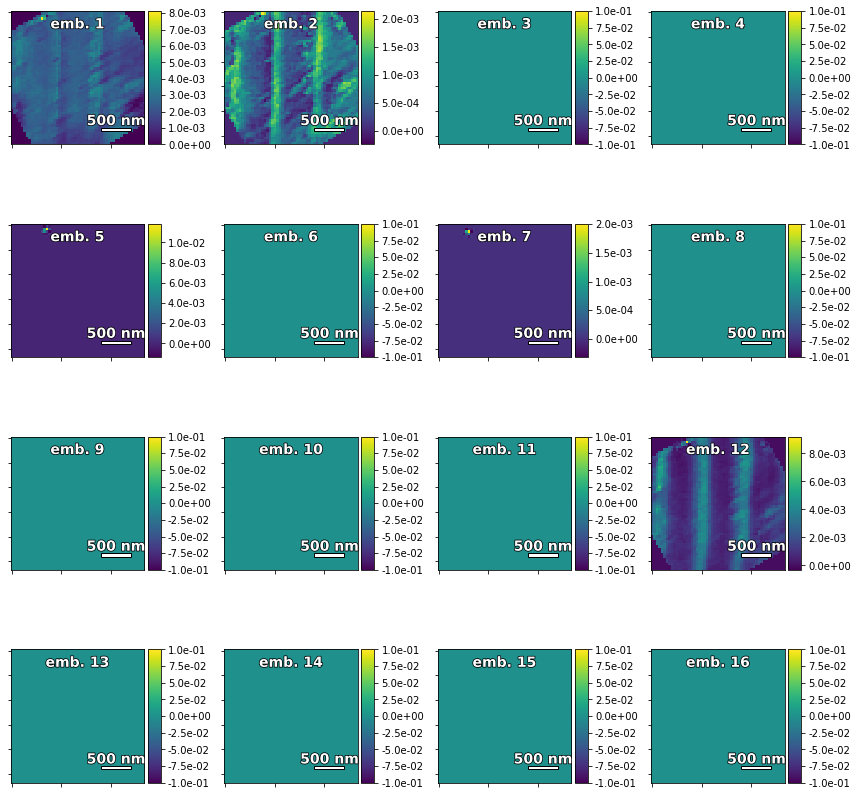

In [31]:
# plots the embedding maps
_ = viz.plot.embedding_maps(piezoresponse_embeddings,
                            printing,
                            plot_format,
                            folder_piezoresponse_autoencoder,
                            filename='./resnet_jagar_data_16')

In [24]:
activation.shape

(3600, 16)

In [49]:
??rnn.train_model

In [50]:
import h5py